# Example: Rosenbrock function

For more information of the Rosenbrock function please visit: https://en.wikipedia.org/wiki/Rosenbrock_function

In [1]:
# General imports.
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add the source code file in the path.
module_path = os.path.abspath(os.path.join('../src/'))

if module_path not in sys.path:
    sys.path.append(module_path)
# _end_if_
    
# Import local HMC implementation.
from hmc_sampler import HMC

In [2]:
# Define the Rosenbrock function and its gradient.
def rose_func(v, a=1.15, b=0.5):
    x, y = v
    return (a - x)**2 + b*(y - x**2)**2
# _end_def_

def rose_grad(v, a=1.15, b=0.5):
    x, y = v
    return np.array([2.0*(x - a) - 4.0*b*x*(y - x**2),
                     2.0*b*(y - x**2)])
# _end_def_

In [3]:
# Create an HMC object.
rose_hmc = HMC(rose_func, rose_grad, n_omitted=500, n_samples=2_500, n_chains=1,
               verbose=True, grad_check=True, rng_seed=911, kappa=50, d_tau=0.02)

# Print out the settings.
print(rose_hmc)

 HMC Id(4851890176): 
 Func(x)=<function rose_func at 0x121318b80> 
 Grad(x)=<function rose_grad at 0x121318c10> 
 Options:
 	n_samples: 2500
	n_omitted: 500
	kappa: 50
	d_tau: 0.02
	grad_check: True
	generalized: False
	verbose: True
	n_chains: 1
	rng_seed: RandomState(MT19937)



In [4]:
# Run the sampling from x0 starting point.
results = rose_hmc(x0=[0.0, 10.0])

Grad-Check error <BEFORE> sampling = 2.861E-07

HMC started with 1 chain(s) ... 


 Chain -> 0: Iter=2000 | E=0.136 | Acceptance=1.000: 100%|██████████| 3000/3000 [00:03<00:00, 868.81it/s]

 >>> Chain -> 0 finished in 3.454 seconds.
Chain -> 0: Grad-Check error <AFTER> sampling = 2.562E-08
HMC finished in 3.470 seconds.


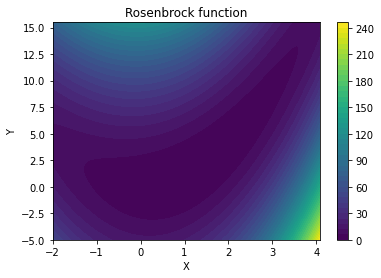

In [5]:
# Step size.
delta = 0.01

# Discretized x/y dimensions.
xk = np.arange(-2.0, 4.10, delta)
yk = np.arange(-5.0, 15.5, delta)

# Get the meshgrid.
X, Y = np.meshgrid(xk, yk)

# Evaluate the function.
Z = rose_func([X, Y], a=1.15, b=0.5)

# This is the "real" function.
plt.contourf(X, Y, Z, levels=40)
plt.title("Rosenbrock function")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar();

In [6]:
# It is easier to convert the data directly to pandas.
df = pd.DataFrame(results["Chain-0"]["Samples"])

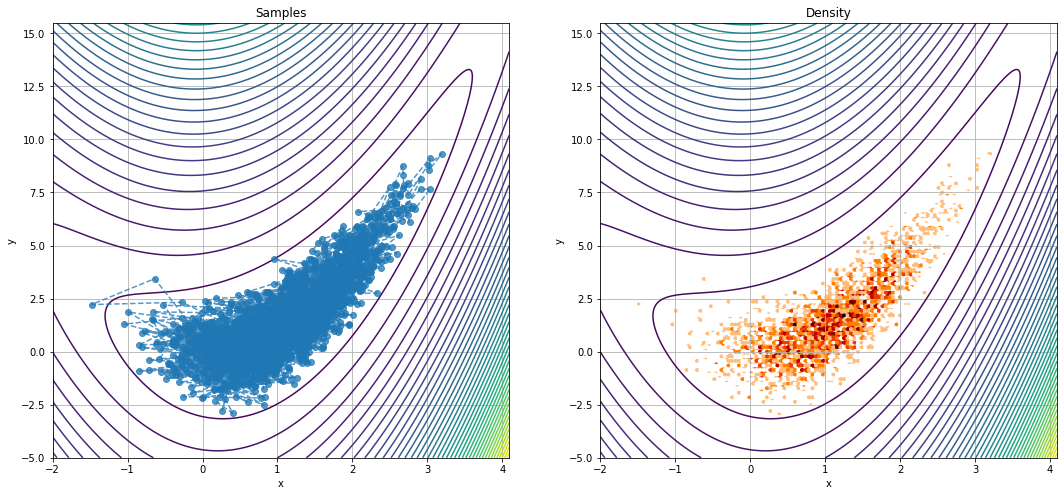

In [7]:
# Create a large figure.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

ax[0].contour(X, Y, Z, levels=40)
ax[0].plot(df[0], df[1], 'o--', alpha=0.75)
ax[0].set_title("Samples")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].grid(True)

ax[1].contour(X, Y, Z, levels=40)
ax[1].hexbin(df[0], df[1], bins=100, cmap='gist_heat_r')
ax[1].set_title("Density")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].grid(True); 

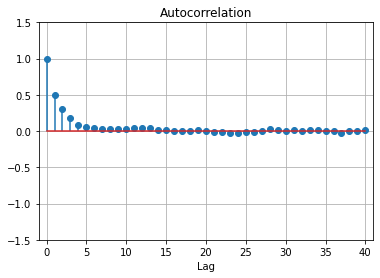

In [8]:
# ACF lag value.
lag_n = 40

# Plot the ACF.
plt.stem(rose_hmc.acf(lag_n=lag_n)[0])

plt.grid(True)

plt.title("Autocorrelation")

plt.xlim([-1, lag_n+1])

plt.ylim([-1.5, 1.5])

plt.xticks(range(0, lag_n+1, 5))

plt.xlabel("Lag");

### End-of-notebook